# KünstlicheNeuronaleNetze
In diesem Notebook wollen wir ein Künstliches Neuronales Netzwerk erstellen.

Im Gegensatz zu den bisher verwendeten Jupyter Notebooks kommt dieses Notebook nicht mehr mit den in Anaconda bereits installierten Packages aus. Wir müssen, damit dieses Notebook funktioniert, das Package *Keras* installieren. Dazu öffnet man unter Windows das Programm *Anaconda Powershell Prompt* (unter Linux oder Mac ein Terminalfenster öffnen) und gibt nacheinander folgenden Befehl ein:

* conda create -n tensorflow_env tensorflow
* conda activate tensorflow_env
* conda install -c anaconda keras

Die Ausführung jeweils nach einigen Sekunden mit einem **y** bestätigen, dann wird das Package installiert.

Als Datensatz verwenden wir wieder *diabetes2.csv* und versuchen, eine Diabetes-Erkrankung vorherzusagen.


| Feature  | Bedeutung                                  |
|----------|--------------------------------------------|
| Pregnancies   | Number of times pregnant   |
| Glucose      | Plasma glucose concentration a 2 hours in an oral glucose tolerance test  |
| BloodPressure       | Diastolic blood pressure (mm Hg)    |
| SkinThickness | Triceps skin fold thickness (mm)   |
| Insulin     | 2-Hour serum insulin (mu U/ml)    |
| BMI      | Body mass index (weight in kg/(height in m)^2)|
| DiabetesPedigreeFunction  | Diabetes pedigree function   |
| Age  |Age (years)     |
| **Outcome**| Class variable (0 or 1)  |

Wir teilen den Datensatz wieder in Trainings- und Testdaten auf, erstellen ein Objekt der Klasse *Sequential* und fügen mit der *add*-Methode mehrere Layer hinzu. Als Aktivierungsfunktion verwenden wir für die Hidden Layer die *relu-*, für die Output-Schicht die *Sigmoid*-Funktion. Für die Qualitätsbeurteilung geben wir an, dass wir die Accuracy verwenden wollen. Das Training des Modells wird mit jeweils 10 Beobachtungen durchgeführt mit einer festgelegten Gesamtanzahl an Wiederholungen, den *epoches*, womit jeweils die Accuracy (bezogen auf die Trainingsdaten) ermittelt wird.

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/troescherw/datasets/master/diabetes2.csv"
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Da *Sequential* die Daten in Form eines Arrays benötigt, wandeln wir das DataFrame in ein Pandas Array um:

In [2]:
import numpy as np
df = df.values

Wie üblich teilen wir den Datensatz in einen Test- und Trainingsdatensatz auf.

In [3]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
X = df[:,:8]
y = df[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=True, random_state=42)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Nun erstellen wir das KNN, in dem wir ein Objekt der Klasse *Sequential* erstellen und die Layer hinzufügen. Außerdem definieren wir die Aktivierungsfunktionen. Außerdem entfernen wir auch Kanten aus dem Netz, sodass ggf. zu starke Gewichtungen wieder herauszunehmen, was u.U. zu Overfitting führt. Dies erreichen wir mit einem *Dropout*-Objekt.

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


model = Sequential()
model.add(Dense(16, activation='relu', input_dim=8))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',  loss='categorical_crossentropy',   metrics=['accuracy'])


Nun trainieren wir das Netz, was allerdings etwas dauert...

In [5]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=10, verbose=0)

Wir können die Accuracy, die im Laufe des Trainings ermittelt wurde, als Plot ausgeben.

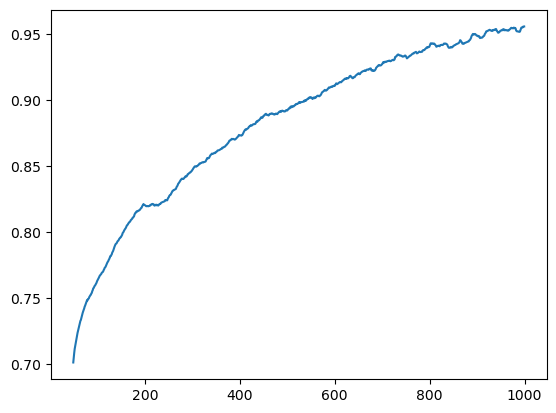

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
plt.plot(pd.DataFrame(history.history["accuracy"]).rolling(50).mean())

Schließlich geben wir noch einen Report aus.

In [10]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy Testdaten: {scores[1]}")

Accuracy Testdaten: 0.6666666865348816
